<a href="https://colab.research.google.com/github/gaurika05/Neural_Networks_Deep_Learning/blob/main/IMG_FER2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision
from torch.utils import data
import torchvision.datasets as datasets
import torchvision.transforms as transforms


In [4]:
import os
os.environ["KAGGLE_USERNAME"] = "gaurikagupta03"
os.environ["KAGGLE_KEY"]="b44e32397991310893c6f8331b04345d"
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 98% 279M/285M [00:01<00:00, 167MB/s]
100% 285M/285M [00:01<00:00, 184MB/s]


In [5]:
! unzip challenges-in-representation-learning-facial-expression-recognition-challenge.zip

Archive:  challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [8]:
device

device(type='cuda')

In [9]:
train_df= pd.read_csv("train.csv")

In [10]:
train_df.shape

(28709, 2)

In [11]:
train_df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [12]:
class_names=["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]


In [13]:
img = train_df['pixels'][0]
# returns string type of data

In [14]:
img

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [15]:
img.split(' ')

['70',
 '80',
 '82',
 '72',
 '58',
 '58',
 '60',
 '63',
 '54',
 '58',
 '60',
 '48',
 '89',
 '115',
 '121',
 '119',
 '115',
 '110',
 '98',
 '91',
 '84',
 '84',
 '90',
 '99',
 '110',
 '126',
 '143',
 '153',
 '158',
 '171',
 '169',
 '172',
 '169',
 '165',
 '129',
 '110',
 '113',
 '107',
 '95',
 '79',
 '66',
 '62',
 '56',
 '57',
 '61',
 '52',
 '43',
 '41',
 '65',
 '61',
 '58',
 '57',
 '56',
 '69',
 '75',
 '70',
 '65',
 '56',
 '54',
 '105',
 '146',
 '154',
 '151',
 '151',
 '155',
 '155',
 '150',
 '147',
 '147',
 '148',
 '152',
 '158',
 '164',
 '172',
 '177',
 '182',
 '186',
 '189',
 '188',
 '190',
 '188',
 '180',
 '167',
 '116',
 '95',
 '103',
 '97',
 '77',
 '72',
 '62',
 '55',
 '58',
 '54',
 '56',
 '52',
 '44',
 '50',
 '43',
 '54',
 '64',
 '63',
 '71',
 '68',
 '64',
 '52',
 '66',
 '119',
 '156',
 '161',
 '164',
 '163',
 '164',
 '167',
 '168',
 '170',
 '174',
 '175',
 '176',
 '178',
 '179',
 '183',
 '187',
 '190',
 '195',
 '197',
 '198',
 '197',
 '198',
 '195',
 '191',
 '190',
 '145',
 '86'

In [16]:
train_df["new pixels"]=[[int(y) for y in x.split()] for x in train_df["pixels"]]
# first pixel string row then split then stored in y and typecasted to int


In [17]:
train_df.head()

,emotion,pixels,new pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23..."


In [18]:
# typecast list to array
img = np.array(train_df["new pixels"][0])
img = img.reshape((48,48))

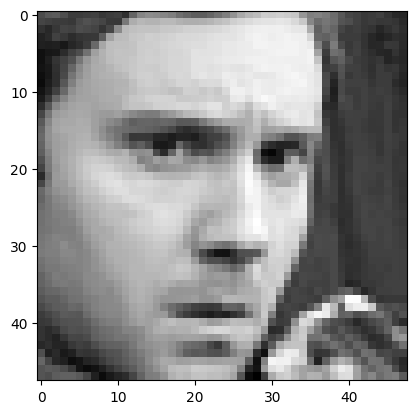

In [19]:
plt.imshow(img, cmap='gray')
plt.show()

In [20]:
test_df = pd.read_csv("test.csv")


In [21]:
test_df.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [22]:
test_df["pixels"][0]

'254 254 254 254 254 249 255 160 2 58 53 70 77 76 75 78 68 18 32 29 0 54 73 75 72 68 75 77 76 76 75 80 51 36 47 40 44 42 37 48 40 64 54 54 86 16 0 161 254 254 254 254 254 248 255 120 2 38 50 47 76 76 83 63 51 142 174 159 88 59 48 67 37 61 46 77 77 75 74 85 19 54 81 73 50 49 53 72 45 41 66 53 70 17 0 122 254 254 254 254 253 253 250 61 17 52 34 34 76 79 68 50 129 235 214 219 226 215 183 116 127 218 93 43 79 80 74 79 57 40 73 30 77 64 49 83 65 38 70 57 72 26 0 114 254 254 254 254 252 255 231 53 17 61 8 2 76 61 21 125 226 207 208 209 206 213 217 226 224 218 214 96 36 67 79 78 51 37 76 7 71 37 51 82 56 59 84 79 82 59 2 74 254 254 254 254 252 255 223 47 16 83 59 54 77 37 127 226 208 211 210 211 212 210 209 207 206 207 216 216 80 24 80 76 64 54 66 3 68 22 58 54 40 83 61 64 65 52 2 96 254 254 254 254 250 255 185 19 25 62 77 80 48 83 228 208 210 213 212 210 211 212 213 213 211 213 208 215 216 88 47 86 69 82 45 18 80 36 38 2 34 53 39 41 40 48 2 124 254 254 254 254 250 255 173 11 30 45 74 75 51 1

In [23]:
test_df['new pixels']= [[int(y) for y in x.split()]for x in test_df['pixels']]

In [24]:
test_df["new pixels"][0]

[254,
 254,
 254,
 254,
 254,
 249,
 255,
 160,
 2,
 58,
 53,
 70,
 77,
 76,
 75,
 78,
 68,
 18,
 32,
 29,
 0,
 54,
 73,
 75,
 72,
 68,
 75,
 77,
 76,
 76,
 75,
 80,
 51,
 36,
 47,
 40,
 44,
 42,
 37,
 48,
 40,
 64,
 54,
 54,
 86,
 16,
 0,
 161,
 254,
 254,
 254,
 254,
 254,
 248,
 255,
 120,
 2,
 38,
 50,
 47,
 76,
 76,
 83,
 63,
 51,
 142,
 174,
 159,
 88,
 59,
 48,
 67,
 37,
 61,
 46,
 77,
 77,
 75,
 74,
 85,
 19,
 54,
 81,
 73,
 50,
 49,
 53,
 72,
 45,
 41,
 66,
 53,
 70,
 17,
 0,
 122,
 254,
 254,
 254,
 254,
 253,
 253,
 250,
 61,
 17,
 52,
 34,
 34,
 76,
 79,
 68,
 50,
 129,
 235,
 214,
 219,
 226,
 215,
 183,
 116,
 127,
 218,
 93,
 43,
 79,
 80,
 74,
 79,
 57,
 40,
 73,
 30,
 77,
 64,
 49,
 83,
 65,
 38,
 70,
 57,
 72,
 26,
 0,
 114,
 254,
 254,
 254,
 254,
 252,
 255,
 231,
 53,
 17,
 61,
 8,
 2,
 76,
 61,
 21,
 125,
 226,
 207,
 208,
 209,
 206,
 213,
 217,
 226,
 224,
 218,
 214,
 96,
 36,
 67,
 79,
 78,
 51,
 37,
 76,
 7,
 71,
 37,
 51,
 82,
 56,
 59,
 84,
 79,
 82,
 59,
 

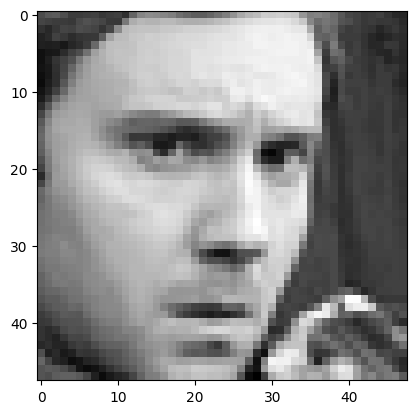

In [25]:
# typecast list into array
test_img = np.array(test_df["new pixels"][0])
test_img = img.reshape((48,48))
plt.imshow(img,cmap="gray")
plt.show()

In [33]:
# Inherit Dataset class coming from data package
class Dataset(data.Dataset):
  def __init__(self, df ):
    self.df = df
  def __len__(self):
    return len(self.df)

  def __getitem__(self,index):
    #loading data -> one image at a time
    x=self.df.iloc[index]["new_pixels"]
    x=np.array(x).reshape(48,48,1)
    x = torch.tensor(x)
    y=self.df.iloc[index]["emotion"]
    # x=torch.cat((x,x,x),0)
    return x,y

In [34]:
training_set = Dataset(train_df)

In [35]:
training_set

In [36]:
params = {"batch_size" : 64, "shuffle" : True}
training_generator = data.DataLoader(training_set, **params)

In [37]:
training_generator

In [38]:
training_set[2134][1]

KeyError: ignored

In [ ]:
training_set[2134][0].shape

In [ ]:
plt.imshow(training_set[2134][0].squeeze())
plt.show()